In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1, 1)
test_input = train_input.reshape(-1, 1)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [11]:
print(knr.predict([[50]]))

[1033.33333333]


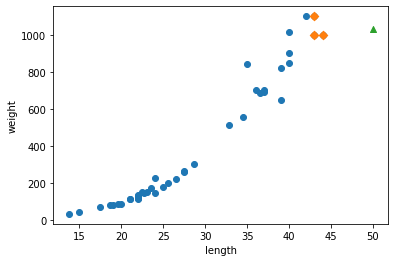

In [12]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

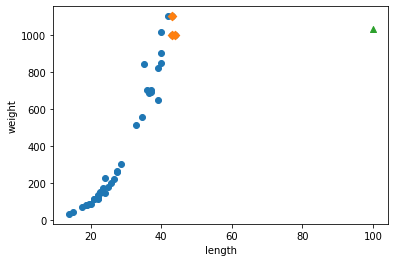

In [13]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[67.30998637]
[0.82021132]
-68.0248807089298


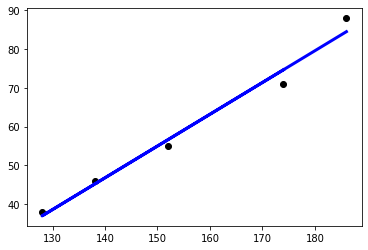

In [30]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174], [152], [138], [128], [186]]
Y = [71, 55, 46, 38, 88]
reg.fit(X, Y)

print(reg.predict([[165]]))
print(reg.coef_)
print(reg.intercept_)
plt.scatter(X, Y, color = 'black')

y_pred = reg.predict(X)

plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.show()

[42.37704918]
[-11.02459016]
42.37704918032787


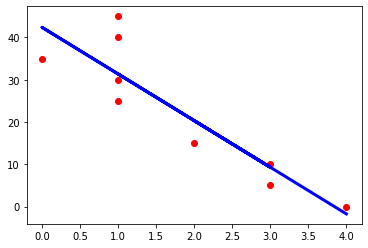

In [31]:
streching = [0, 30, 10, 15, 5,25,35,40, 45]
hurt = [[4],[1],[3],[2],[3],[1],[0],[1],[1]]
reg.fit(hurt, streching)
print(reg.predict([[0]]))
print(reg.coef_)
print(reg.intercept_)
plt.scatter(hurt, streching, color = 'red')

strech_pred = reg.predict(hurt)

plt.plot(hurt, strech_pred, color = 'blue', linewidth = 3)
plt.show()

[68.2404678]
[0.20036151]
-324.8688202941541


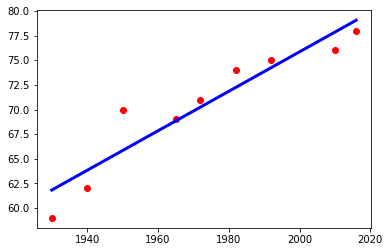

In [32]:
years = [[1930],[1940],[1950],[1965],[1972],[1982],[1992],[2010],[2016]]
age = [59,62,70,69,71,74,75,76,78]
reg.fit(years, age)
print(reg.predict([[1962]]))
print(reg.coef_)
print(reg.intercept_)
plt.scatter(years, age, color = 'red')

age_pred = reg.predict(years)

plt.plot(years, age_pred, color = 'blue', linewidth = 3)
plt.show()

In [136]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [137]:
diabetes.data.shape

(442, 10)

In [55]:
print(diabetes.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [186]:
train_input, test_input, train_target, test_target = train_test_split(diabetes.data, diabetes.target, random_state = 0)


In [187]:
print(train_input.shape)
print(test_input.shape)

(331, 10)
(111, 10)


In [188]:
reg.fit(train_input, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
y_pre = reg.predict(test_input)

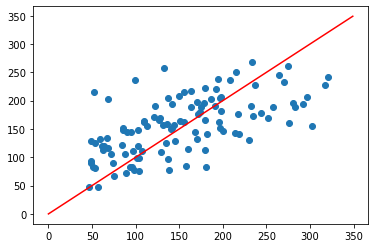

In [193]:
plt.scatter(test_target, y_pre)
plt.plot(np.arange(0,350), np.arange(0,350), color = 'red')

plt.show()

In [154]:
reg.score(test_input, test_target)

0.35940090989715534

In [171]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [172]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr. fit(train_input, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
print(lr.predict([[50]]))

[1241.83860323]


In [174]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


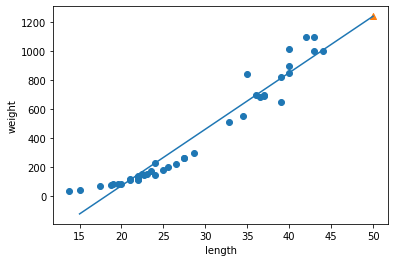

In [178]:
plt.scatter(train_input, train_target)

plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [180]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


In [175]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [176]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [181]:
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [182]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


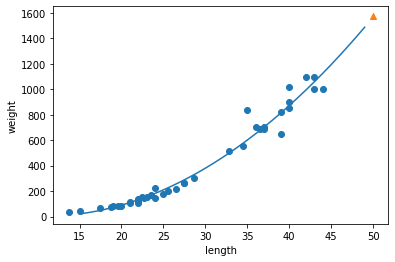

In [183]:
point = np.arange(15,50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.5*point + 116)

plt.scatter([50], [1574], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [184]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [205]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [206]:
print(perch_weight)

[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


In [248]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [249]:
from sklearn.preprocessing import PolynomialFeatures

In [250]:
poly = PolynomialFeatures( include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [251]:
print(train_input.shape)

(42, 3)


In [252]:
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [253]:
print(train_poly.shape)

(42, 9)


000
100
010
001
110
011
101
200
020
002


In [254]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [255]:
test_poly = poly.transform(test_input)

In [256]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [257]:
print(lr.score(test_poly, test_target))

0.9714559911594132


In [262]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [263]:
print(train_poly.shape)

(42, 55)


In [264]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991096


In [265]:
print(lr.score(test_poly, test_target))

-144.40579242335605


In [276]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [279]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [280]:
print(ridge.score(test_scaled, test_target))

0.9790693977615396


In [282]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score = []
test_score = []
for alpha in alpha_list:
  ridge = Ridge(alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

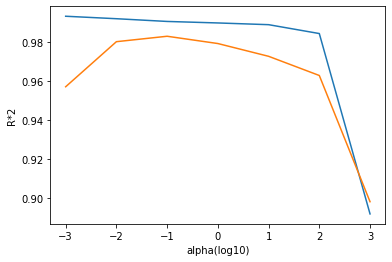

In [284]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha(log10)')
plt.ylabel('R^2')
plt.show()

In [285]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9897898972080961


In [286]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [290]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score = []
test_score = []
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


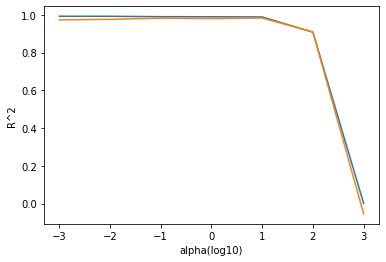

In [291]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha(log10)')
plt.ylabel('R^2')
plt.show()